<a href="https://colab.research.google.com/github/SehanArandara/DL-Codepro/blob/main/02_Classification_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sehanarandara
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight


100%|██████████| 20.3k/20.3k [00:00<00:00, 5.80MB/s]

In [8]:
# load data set
data = pd.read_csv("/content/male-female-height-and-weight/Test set.csv")
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [11]:
# female = 0 and male = 1   --> we can do it two ways

# data['Sex'] = data['Sex'].map({'Female':0,'Male':1})
# data.head()


data.loc[data.Sex == 'Female', 'Sex'] = 0
data.loc[data.Sex == 'Male', 'Sex'] = 1
data.head()


,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [21]:
# get the x and y
x = data.iloc[:,:2]
y = data.iloc[:,2]
y = y.astype('int')
y.head()

,Sex
0,0
1,1
2,1
3,1
4,0


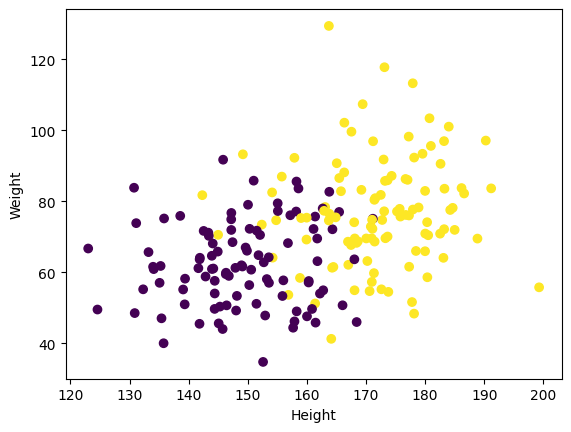

In [22]:
# visualize the data
plt.scatter(x.Height,x.Weight,c=y)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [23]:
# split data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape , x_test.shape , x.shape

((164, 2), (41, 2), (205, 2))

In [63]:
# Create a Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(2,)) ,
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

#compile model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics = ['accuracy'])

# train the model
history = model.fit(x_train,y_train,epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4501 - loss: 2.3010
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5362 - loss: 0.7985 
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5443 - loss: 0.7589 
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4569 - loss: 0.7640 
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 0.6941 
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5070 - loss: 0.7048 
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4839 - loss: 0.7165 
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5001 - loss: 0.6832 
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5742 - loss: 0.6928 
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5528 - loss: 0.7435 
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5538 - loss: 0.7417 
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5260 - loss: 0.7242 
Epoch 13/30
6

In [64]:
# summary of the model architecture
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,133 (16.15 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,756 (10.77 KB)

In [65]:
# Model Evaluate
model.evaluate(x_test,y_test)    # return the loss and accuaracy

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5615 - loss: 0.6933  


[0.6936055421829224, 0.5609756112098694]

In [66]:
y_pred =  model.predict(x_test)

# x_test[:5]
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.650468  ],
       [0.5581646 ],
       [0.66617054],
       [0.39205962],
       [0.73406297]], dtype=float32)

In [67]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


In [68]:
# check the perormance    -- >  Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,y_pred)
precision.result().numpy()

0.5277778

In [69]:
# check the perormance    -- >  Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test,y_pred)
recall.result().numpy()

0.95

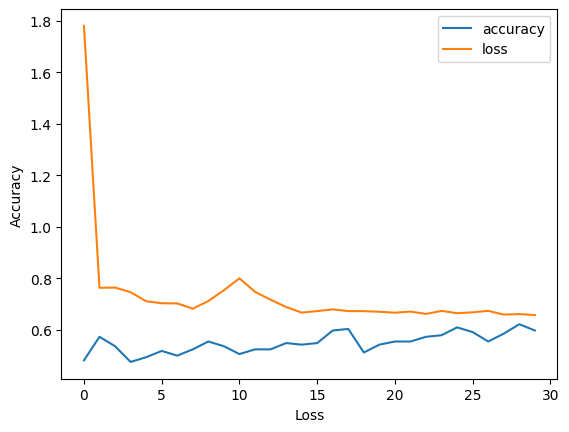

In [71]:
# plot accuaracy and the prediction
pd.DataFrame(history.history).plot()
# label


